### Student Information
Name: 林冠廷

Student ID: 106012017

GitHub ID: DanielLin94144

Kaggle name: Daniel Lin

Kaggle private scoreboard snapshot:

![](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

### 1. Take home exercises

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("../DM2020-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../DM2020-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../DM2020-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../DM2020-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [5]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [6]:
### testing data
anger_test = pd.read_csv("../DM2020-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../DM2020-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../DM2020-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../DM2020-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
train_count_vect = CountVectorizer(stop_words = 'english')
test_count_vect = CountVectorizer(stop_words = 'english')
X_train_counts = train_count_vect.fit_transform(train_df.text)
X_test_counts = test_count_vect.fit_transform(test_df.text)

In [33]:
print('train shape:', X_train_counts.shape)
print('test shape:', X_test_counts.shape)

train shape: (3613, 9850)
test shape: (347, 1773)


In [35]:
train_count_vect.get_feature_names()[:10]

['00', '000', '00pm', '00tiffanyr', '01', '02', '03', '0303', '034', '04']

In [43]:
X_train_count_pd = pd.DataFrame(columns = train_count_vect.get_feature_names(), data = X_train_counts.toarray())
X_test_count_pd = pd.DataFrame(columns = test_count_vect.get_feature_names(), data = X_test_counts.toarray())

In [37]:
X_train_count_pd.head()

,00,000,00pm,00tiffanyr,01,02,03,0303,034,04,...,zoolander,zumba,óg,деньги,الخفجي,اليوم_الوطني,ध_य,य_ब,सत,アニメ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Do summation for all record, so we can get the term frequency of all record in training and testing set.
* Show the top-30 frequent term below: 

In [233]:
train_30 = X_train_count_pd.sum().sort_values(ascending=False)[:30]

In [232]:
test_30 = X_test_count_pd.sum().sort_values(ascending=False)[:30]

In [235]:
train_30.index

Index(['just', 'like', 'don', 'amp', 'people', 'time', 'day', 'know', 'good',
       'love', 'watch', 'think', 'make', 've', 'today', 'happy', 'want', 'got',
       'lost', 'really', 'live', 'life', 'need', 'll', 'feel', 'let', 'way',
       'amazing', 'going', 'start'],
      dtype='object')

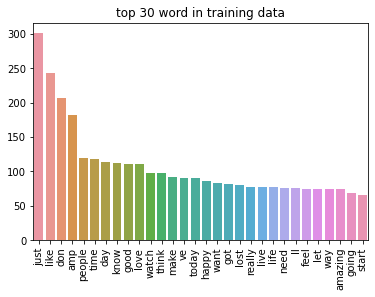

In [249]:
import seaborn as sns
g = sns.barplot(x=train_30.index, y=train_30)
g.set_xticklabels(train_30.index, rotation = 90);
plt.title("top 30 word in training data")
plt.show()

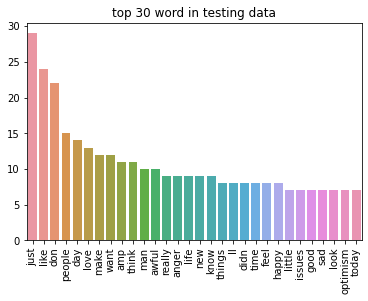

In [248]:
g = sns.barplot(x=test_30.index, y=test_30)
g.set_xticklabels(test_30.index, rotation = 90);
plt.title("top 30 word in testing data")
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [50]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf_vect.fit(train_df.text)
train_tfidf = tfidf_vect.transform(train_df.text)
test_tfidf = tfidf_vect.transform(test_df.text)

C:\Users\Lin Guan Ting\Anaconda3\envs\DLenv\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [52]:
print('train tfidf shape:', train_tfidf.shape)
print('test tfidf shape:', test_tfidf.shape)

train tfidf shape: (3613, 1000)
test tfidf shape: (347, 1000)


In [53]:
tfidf_vect.get_feature_names()[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

---
### ** >>> Exercise 3 (Take home): **  
![](confusion_matrix.png)
Can you interpret the results above? What do they mean?

1. First I have to point out that the axis in above plot is wrong, in [sklearn document](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) they use true label on row-axis, and predicted label in col-axis. Correct confusion matrix plot:
![](correct_cm.png)
2. Because "fear" contains most porprotion, model tends to predict "fear" and lots of examples that are predicted as "fear" are not "fear". As a result, model can't classify "fear" and others very well, e.g., for "fear" and "anger", model predicted 15 examples are "angry" actually are "fear"; on the other hand,  model predicted 12 examples are "fear" actually are "anger".

---
### ** >>> Exercise 4 (Take home): **
Build a model using a Naive Bayes model and train it. What are the testing results?

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [61]:
X_train = train_tfidf
X_test= test_tfidf
y_train = train_df['emotion']
y_test = test_df['emotion']

In [62]:
print("y_train shape:", y_train.shape)

y_train shape: (3613,)


In [64]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.86
testing accuracy: 0.76
              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347



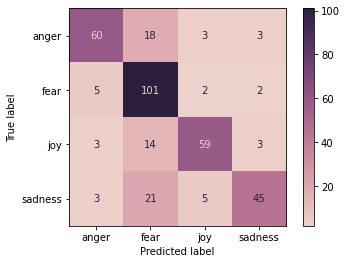

In [67]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
plot_confusion_matrix(clf, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

---
### ** >>> Exercise 5 (Take home): **¶
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

* Naive Bayes classifer consider the class distribution p(C) in its equation, so the unbalanced data casues the model to predict "fear" in too-much-large amount (# of examples predicted "fear", Naive bayes: 154; decision tree: 107), making "fear" has the lowest precision (0.66).
* Except for overpredicting "fear", the f1 score of other labels' prediction are greater then decision tree model. The reason may come from that decision tree would overfit to the dataset due to too deep subtree, so the generalized ability isn't good for the vanilla decision tree in this case. 

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pic3.png" style="width: 300px;"/> </td>
    <td><img src="pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [69]:
training_log = pd.read_csv("training_log.csv")

In [72]:
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.357321,1.331441,0.403458,1.303430
1,1,0.631331,1.009061,0.654179,0.933611
2,2,0.789648,0.594773,0.703170,0.834452
3,3,0.846111,0.420835,0.680115,0.823708
4,4,0.879325,0.333459,0.662824,0.870670
5,5,0.907833,0.269892,0.682997,0.920399
6,6,0.923056,0.224140,0.657061,0.962127
7,7,0.941877,0.190499,0.659942,1.014630
8,8,0.949903,0.159279,0.651297,1.085380
9,9,0.962635,0.135167,0.651297,1.138142


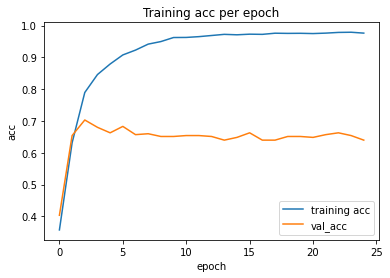

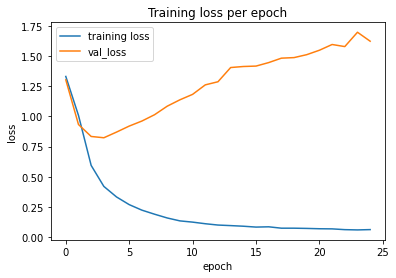

In [83]:
import matplotlib.pyplot as plt
# acc
plt.plot(training_log.epoch, training_log.accuracy, training_log.epoch, training_log.val_accuracy)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend(["training acc", "val_acc"])
plt.title("Training acc per epoch")
plt.show()
# loss
plt.plot(training_log.epoch, training_log.loss, training_log.epoch, training_log.val_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["training loss", "val_loss"])
plt.title("Training loss per epoch")
plt.show()

At about epoch 2, model started to overfit on training data: 
1. While the training accuracy keeps increasing, the validation accuracy is still at the same level and even decreases a little bit.
2. As the training loss decreases to nearly zero, the validation loss strongly increases.  <br>
Both two phenomenons are classical in the overfitting issue because model fits too well on training set trivial details, and it loses the generalized ability on validation set.


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [85]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

In [131]:
train_vec.shape

(3613, 300)

In [212]:
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop = stopwords.words('english')

def tokenizer(text):
    return [ w for w in re.split('\s+', text.strip()) \
            if w not in stop]


[nltk_data] Downloading package stopwords to C:\Users\Lin Guan
[nltk_data]     Ting\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
train_df['unigrams'] = train_df['text'].apply(tokenizer)
test_df['unigrams'] = test_df['text'].apply(tokenizer)

In [214]:
train_df

,id,text,emotion,intensity,unigrams
453,10453,Get to work and there's a fire drill. #fire #...,anger,0.479,"[Get, work, there's, fire, drill., #fire, #out..."
1346,20489,Damnnit! Gonna be 1400 pts shy on Chiefs Rewar...,fear,0.521,"[Damnnit!, Gonna, 1400, pts, shy, Chiefs, Rewa..."
177,10177,@sebbyD27850 both are nonsensical. If there's ...,anger,0.690,"[@sebbyD27850, nonsensical., If, there's, inju..."
690,10690,-- haired man strides close and watches as the...,anger,0.322,"[--, haired, man, strides, close, watches, Maj..."
1317,20460,"@Relaqss I know she did horrible shit, but it ...",fear,0.542,"[@Relaqss, I, know, horrible, shit,, make, any..."
...,...,...,...,...,...
1405,20548,@hotpatooties more like quickie divorce #awful,fear,0.500,"[@hotpatooties, like, quickie, divorce, #awful]"
1389,20532,@Zak_Atif two congressional hearings in USA st...,fear,0.500,"[@Zak_Atif, two, congressional, hearings, USA,..."
2622,30618,@suavecitamay sparkling water is nice you know...,joy,0.340,"[@suavecitamay, sparkling, water, nice, know, ..."
780,10780,@leener00 @libbyfloyd1 @G_Eazy my snap is andr...,anger,0.271,"[@leener00, @libbyfloyd1, @G_Eazy, snap, andri..."


In [224]:
import numpy as np
def sentence2vec(unigram):
    count = 0
    vec = np.zeros((300))
    for i in range(0, len(unigram)):
        try:
            vec += w2v_google_model[unigram[i]]
            count += 1
        except KeyError:
            pass
    vec /= count
    return vec
            

In [225]:
train_sent_vec = train_df["unigrams"].apply(sentence2vec)
test_sent_vec = test_df["unigrams"].apply(sentence2vec)

In [226]:
train_sent_vec

453     [0.1112060546875, -0.025634765625, -0.05688476...
1346    [0.092559814453125, 0.015066146850585938, 0.04...
177     [0.09180365668402778, 0.042521158854166664, 0....
690     [0.03590809215198864, 0.10406979647549716, 0.0...
1317    [-0.017525809151785716, -0.002811976841517857,...
                              ...                        
1405    [-0.014322916666666666, 0.042154947916666664, ...
1389    [-0.030691964285714284, 0.07531956263950892, 0...
2622    [0.033447265625, 0.085845947265625, 0.07097516...
780     [-0.0286865234375, -0.013671875, -0.34765625, ...
1313    [0.0099609375, 0.012872314453125, 0.1408386230...
Name: unigrams, Length: 3613, dtype: object

In [227]:
train_vec = train_sent_vec.apply(pd.Series).fillna(0)
test_vec = test_sent_vec.apply(pd.Series).fillna(0)

In [228]:
train_vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
453,0.111206,-0.025635,-0.056885,0.091187,0.142090,0.007263,0.016724,-0.004883,-0.084854,0.177979,...,-0.022217,-0.017494,-0.101624,0.083786,0.045410,-0.085632,-0.027222,-0.129318,0.089844,0.039833
1346,0.092560,0.015066,0.040253,0.107403,0.064240,0.048859,-0.131500,-0.106674,0.133026,0.098831,...,0.018097,0.056007,-0.152924,-0.080032,-0.005508,-0.064819,0.079407,-0.079315,-0.039825,0.067642
177,0.091804,0.042521,0.048414,0.093686,-0.084635,0.013418,0.060927,-0.017497,0.071425,0.127767,...,0.034405,0.055840,-0.123400,0.037435,-0.089261,-0.028829,0.006565,-0.107069,0.076340,-0.006022
690,0.035908,0.104070,0.024458,0.000591,-0.142911,-0.057595,-0.026145,-0.126143,0.122492,0.143454,...,-0.078447,-0.040222,-0.164384,0.008994,-0.049771,-0.015647,0.071001,0.027322,-0.064792,0.118131
1317,-0.017526,-0.002812,0.057722,0.109436,-0.039934,0.070513,0.089739,-0.068987,0.124128,0.043056,...,-0.040623,0.118094,-0.113700,0.036534,-0.074184,-0.054844,0.037127,-0.100891,0.037493,-0.039394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,-0.014323,0.042155,-0.373388,0.127279,0.011739,0.159261,0.173910,-0.151713,0.126628,0.075643,...,0.137255,0.060954,-0.052246,0.051351,0.030396,0.069743,-0.051758,0.090983,-0.155273,0.130046
1389,-0.030692,0.075320,0.060702,0.051296,-0.141144,-0.082716,-0.003411,-0.003331,0.076213,-0.016288,...,-0.033831,-0.018114,-0.046906,0.017687,-0.048490,-0.030443,-0.069701,0.014927,0.000854,0.040224
2622,0.033447,0.085846,0.070975,0.054757,0.005995,-0.088335,0.081011,-0.070975,-0.009138,0.081194,...,-0.023647,-0.010672,-0.152414,-0.005197,-0.111677,-0.045201,0.013794,-0.082171,0.054041,-0.047067
780,-0.028687,-0.013672,-0.347656,-0.084473,-0.127930,-0.165039,0.069824,-0.205078,0.184570,0.116699,...,-0.059326,0.304688,-0.221680,0.193359,0.155273,0.143555,-0.091797,-0.232422,-0.054688,-0.006134


In [229]:
train_vec.shape

(3613, 300)

In [230]:
test_vec.shape

(347, 300)

In [231]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_vec, y_train)

y_train_pred = clf.predict(train_vec)
y_test_pred = clf.predict(test_vec)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.68
testing accuracy: 0.54
              precision    recall  f1-score   support

       anger       0.51      0.44      0.47        84
        fear       0.53      0.64      0.58       110
         joy       0.58      0.58      0.58        79
     sadness       0.52      0.45      0.48        74

    accuracy                           0.54       347
   macro avg       0.53      0.53      0.53       347
weighted avg       0.53      0.54      0.53       347



C:\Users\Lin Guan Ting\Anaconda3\envs\DLenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* We can simply do average to all the words in the sentence to get sentence features.
* However, I think this approach couldn't perform well because when averaging those words' vectors, we somehow remove the information in word vectors, thus this sentences' features can't even outperform the features from BOW or tfidf. 

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [251]:
w2v_google_model.most_similar('happy', topn=15)

[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043),
 ('happier', 0.6244627237319946),
 ('Said_Hirschbeck', 0.6234509348869324),
 ('elated', 0.619601845741272),
 ('thankful', 0.6178935766220093),
 ('unhappy', 0.6128038167953491)]

In [255]:
topn = 15
anger_words = ['anger'] + [word_ for word_, sim_ in w2v_google_model.most_similar('anger', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

In [254]:
happy_words

['happy',
 'glad',
 'pleased',
 'ecstatic',
 'overjoyed',
 'thrilled',
 'satisfied',
 'proud',
 'delighted',
 'disappointed',
 'excited',
 'happier',
 'Said_Hirschbeck',
 'elated',
 'thankful',
 'unhappy']

In [256]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [262]:
target_words = anger_words+happy_words+sad_words+fear_words

In [263]:
target_words

['anger',
 'resentment',
 'fury',
 'frustration',
 'outrage',
 'discontent',
 'unhappiness',
 'disgust',
 'indignation',
 'Anger',
 'dissatisfaction',
 'discontentment',
 'hostility',
 'bitterness',
 'rage',
 'revulsion',
 'happy',
 'glad',
 'pleased',
 'ecstatic',
 'overjoyed',
 'thrilled',
 'satisfied',
 'proud',
 'delighted',
 'disappointed',
 'excited',
 'happier',
 'Said_Hirschbeck',
 'elated',
 'thankful',
 'unhappy',
 'sad',
 'saddening',
 'Sad',
 'saddened',
 'heartbreaking',
 'disheartening',
 'Meny_Friedman',
 'parishioner_Pat_Patello',
 'saddens_me',
 'distressing',
 'reminders_bobbing',
 'Turkoman_Shiites',
 'saddest',
 'unfortunate',
 'sorry',
 'bittersweet',
 'fear',
 'fearful',
 'fears',
 'Fear',
 'fearing',
 'worry',
 'dread',
 'feared',
 'anxiety',
 'apprehension',
 'afraid',
 'worries',
 'concern',
 'distrust',
 'worried',
 'Fearful']


color list:
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y']


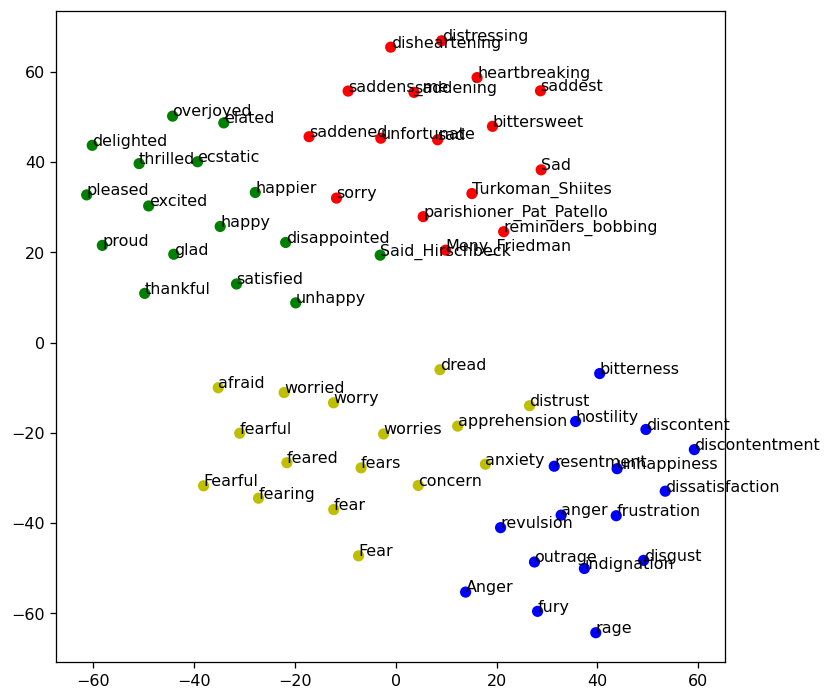

In [264]:
X_train = w2v_google_model[target_words]
target_size = len(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
## training
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### 2. Kaggle competition
In this competition, we provide a dataset which was crawled from Twitter, and we have already labeled the emotion for these tweets by some specific hashtags in the original text. There are 8 classes (or say emotions) in our dataset: anger, anticipation, disgust, fear, sadness, surprise, trust, and joy.

You have to clean the data by doing some pre-processing first. Then, apply feature engineering or any other data mining technique you have or haven't learned in the Data Mining course. The final goal is to learn a model that is able to predict the emotion behind each tweet.

### Data preparation

In [267]:
identification = pd.read_csv("../hw2_comp/data_identification.csv")
emotion = pd.read_csv("../hw2_comp/emotion.csv")

##### There are both training and testing data in "data_identification.csv" file, so we have to find some ways to seperate training and testing set.

In [266]:
identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


* emotion table only contains training data labels
* query the emotion label from training data's tweet id

In [372]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


##### Use pandas.query() to select the training and testing data.

In [457]:
train = identification.query('identification == "train"').copy()
test = identification.query('identification == "test"').copy()

In [369]:
train

,tweet_id,identification
1,0x29e452,train
2,0x2b3819,train
4,0x2a2acc,train
5,0x2a8830,train
6,0x20b21d,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [458]:
test

,tweet_id,identification
0,0x28cc61,test
3,0x2db41f,test
15,0x2466f6,test
23,0x23f9e9,test
31,0x1fb4e1,test
...,...,...
1867495,0x2c4dc2,test
1867496,0x31be7c,test
1867500,0x1ca58e,test
1867515,0x35c8ba,test


##### I use the pandas.merge() function to merge training data's emotion labels according to "tweet_id".

In [370]:
train_data = pd.merge(train, emotion, on='tweet_id', how='left')

In [371]:
train_data

,tweet_id,identification,emotion
0,0x29e452,train,joy
1,0x2b3819,train,joy
2,0x2a2acc,train,trust
3,0x2a8830,train,joy
4,0x20b21d,train,anticipation
...,...,...,...
1455558,0x227e25,train,disgust
1455559,0x293813,train,sadness
1455560,0x1e1a7e,train,joy
1455561,0x2156a5,train,trust


In [382]:
tweets_path = '../hw2_comp/tweets_DM.json'

#### Read text data on Tweets:
##### Read json file by the "jasonlines" opensource package line by line, and I use a tuple data structure to store the "tweet_id" and "text" data.

In [410]:
import jsonlines
def get_tweets(tweets_path):
    with jsonlines.open(tweets_path, 'r') as reader:
        tweets = [(line["_source"]["tweet"]["tweet_id"], line["_source"]["tweet"]["text"]) 
                  for line in reader]
    return tweets

In [411]:
tweets = get_tweets(tweets_path)

In [413]:
tweets

[('0x376b20',
  'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'),
 ('0x2d5350',
  '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'),
 ('0x28b412',
  'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'),
 ('0x1cd5b0', 'Now ISSA is stalking Tasha 😂😂😂 <LH>'),
 ('0x2de201',
  '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>'),
 ('0x1d755c',
  '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH> #authentic #LaughOutLoud good!!'),
 ('0x2c91a8', 'Still waiting on those supplies Liscus. <LH>'),
 ('0x368e95', 'Love knows no gender. 😢😭 <LH>'),
 ('0x249c0c',
  '@DStvNgCare @DStvNg More highlights are being shown than actual sports! Who watches triathlon highlights anyway? <LH> #LeagueCup'

##### The "Dict" and function "get_text()" is used to decode the tweet_id and find text by according tweet_id 

In [444]:
Dict = {t[0]:t[1] for t in tweets}

In [445]:
def get_text(tweet_id):
    try:
        text = Dict[tweet_id]
    except KeyError:
        print('text not found')
    return text

In [446]:
Dict

{'0x376b20': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>',
 '0x2d5350': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN',
 '0x28b412': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>',
 '0x1cd5b0': 'Now ISSA is stalking Tasha 😂😂😂 <LH>',
 '0x2de201': '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>',
 '0x1d755c': '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH> #authentic #LaughOutLoud good!!',
 '0x2c91a8': 'Still waiting on those supplies Liscus. <LH>',
 '0x368e95': 'Love knows no gender. 😢😭 <LH>',
 '0x249c0c': '@DStvNgCare @DStvNg More highlights are being shown than actual sports! Who watches triathlon highlights anyway? <LH> #LeagueCup',
 '0x218443': 'When do you h

In [448]:
train_data["text"] = train_data["tweet_id"].apply(get_text)

In [459]:
test["text"] = test["tweet_id"].apply(get_text)

##### Now I have successfully prepared the training data in the pandas dataframe object, including tweet_id, emotion labels and text.

In [449]:
train_data

,tweet_id,identification,emotion,text
0,0x29e452,train,joy,Huge Respect🖒 @JohnnyVegasReal talking about l...
1,0x2b3819,train,joy,Yoooo we hit all our monthly goals with the ne...
2,0x2a2acc,train,trust,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
3,0x2a8830,train,joy,Come join @ambushman27 on #PUBG while he striv...
4,0x20b21d,train,anticipation,@fanshixieen2014 Blessings!My #strength little...
...,...,...,...,...
1455558,0x227e25,train,disgust,@BBCBreaking Such an inspirational talented pe...
1455559,0x293813,train,sadness,And still #libtards won't get off the guy's ba...
1455560,0x1e1a7e,train,joy,When you sow #seeds of service or hospitality ...
1455561,0x2156a5,train,trust,@lorettalrose Will you be displaying some <LH>...


In [463]:
test_data = test.copy().reset_index(drop=True)
test_data

,tweet_id,identification,text
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...
1,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...
2,0x2466f6,test,"Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,test,@cineworld “only the brave” just out and fount...
4,0x1fb4e1,test,Felt like total dog 💩 going into open gym and ...
...,...,...,...
411967,0x2c4dc2,test,6 year old walks in astounded. Mum! Look how b...
411968,0x31be7c,test,Only one week to go until the #inspiringvolunt...
411969,0x1ca58e,test,"I just got caught up with the manga for ""My He..."
411970,0x35c8ba,test,Speak only when spoken to and make hot ass mus...


##### After preparing the training and testing data as I wanted, I stored them into csv file so that it I can simply access the prepared data in training stage.

In [465]:
train_data.to_csv("train_data.csv")

In [466]:
test_data.to_csv("test_data.csv")

### Training procedure and results
* I follow the [Huggingface Document](https://huggingface.co/transformers/custom_datasets.html) to do transformner-based text classification task.
* I have tried to use two pretrained language models, which are "bert-base-uncased" and "roberta-base", and the performances on kaggle is 0.55061 and 0.57297 respectively. 
* [Note] For the details of training code, please refer to "*train.ipynb*" code in my repo. I wrote a simple jupyter notebook to leverage Huggingface's AutoModel and Trainer class, which can simplify my training pipeline.